## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_data = pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
print(f"Number of mice are {len(complete_data['Mouse ID'].unique())}")

Number of mice are 249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = complete_data[complete_data.duplicated(["Mouse ID","Timepoint"])]

duplicate_mouse_IDs = duplicate_mouse_df["Mouse ID"].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_detail_df = complete_data.loc[complete_data["Mouse ID"].isin(duplicate_mouse_IDs)]
duplicate_mouse_detail_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_data_df = complete_data[~complete_data["Mouse ID"].isin(duplicate_mouse_IDs)]
final_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
print(f"Now Number of mice are {len(final_data_df['Mouse ID'].unique())}")

Now Number of mice are 248


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

group_by_drug_regimen_df = final_data_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_summary_df = pd.DataFrame({
    "Mean":group_by_drug_regimen_df["Tumor Volume (mm3)"].mean(),
    "Median":group_by_drug_regimen_df["Tumor Volume (mm3)"].median(),
    "Variance":group_by_drug_regimen_df["Tumor Volume (mm3)"].var(),
    "Standard Deviation":group_by_drug_regimen_df["Tumor Volume (mm3)"].std(),
    "SEM":group_by_drug_regimen_df["Tumor Volume (mm3)"].sem()
})
drug_regimen_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<IPython.core.display.Javascript object>


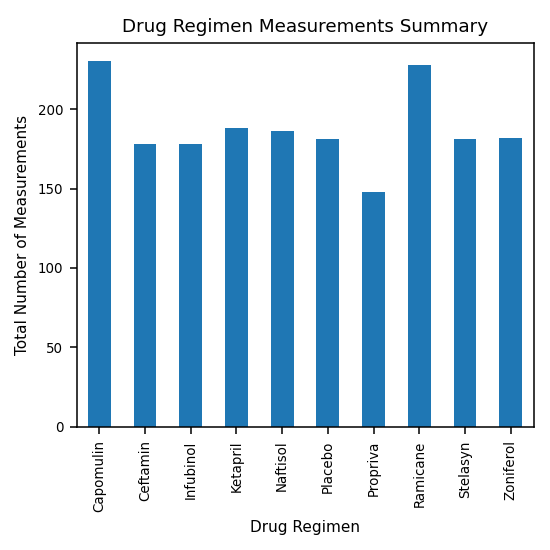

In [207]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook

drug_regimen_df = group_by_drug_regimen_df["Mouse ID"].count()

ax = drug_regimen_df.plot(kind="bar", title="Drug Regimen Measurements Summary",figsize=(4,4),fontsize=7)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Total Number of Measurements")
plt.tight_layout()

<IPython.core.display.Javascript object>


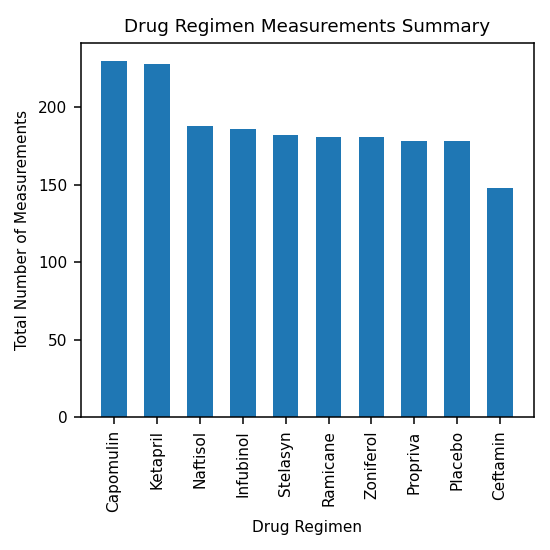

In [209]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

%matplotlib notebook

plt.figure(figsize=(4,4))
plt.bar(final_data_df["Drug Regimen"].unique(),final_data_df["Drug Regimen"].value_counts(), align="center", width=0.6)
plt.xticks(rotation=90)
plt.rc('font', size=8) 

plt.title("Drug Regimen Measurements Summary")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()

In [ ]:

# drug_regimen_df.plot.bar(figsize=(7,6),fontsize=7)
# plt.tight_layout()

# plt.title("Drug Regimen Measurements Summary")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Number of Measurements")
# df = pd.DataFrame(drug_regimen_df)

# df = pd.DataFrame(final_data_df["Drug Regimen"].value_counts())
 
# plt.bar(final_data_df["Drug Regimen"].unique(),df)
# x_axis = np.arange(len(group_by_drug_regimen_df))
# plt.bar(x_axis,group_by_drug_regimen_df["Mouse ID"].count())
# plt.show()

# x_axis = np.arange(len(rain_df))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, group_by_drug_regimen_df["Drug Regimen"], rotation="vertical")
# print(tick_locations)
# plt.xticks(tick_locations, group_by_drug_regimen_df["Drug Regimen"])
# # plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

<IPython.core.display.Javascript object>


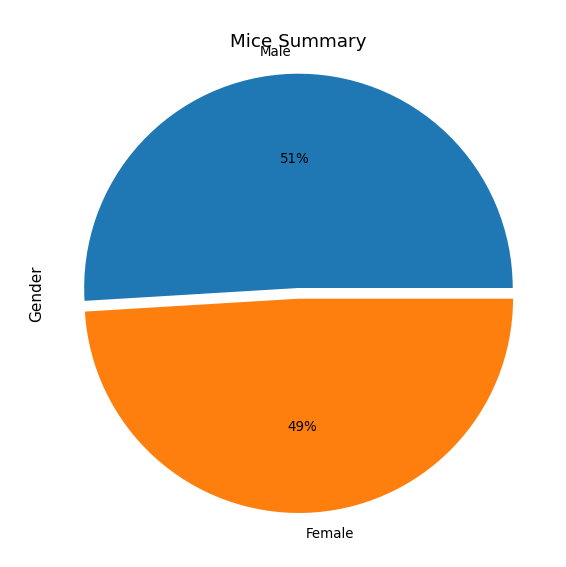

In [213]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

%matplotlib notebook

gender_distribution_df = final_data_df["Sex"].value_counts()
explode = (0, 0.05)
ax = gender_distribution_df.plot(kind="pie", explode=explode, title="Mice Summary",figsize=(3,3),fontsize=7,autopct='%1.0f%%')
ax.set_ylabel("Gender")
ax.axis('equal')
plt.tight_layout()

<IPython.core.display.Javascript object>


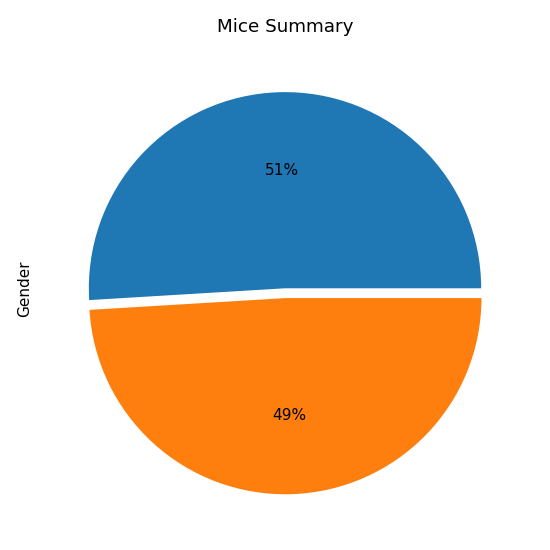

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
plt.figure(figsize=(4,4))
plt.pie(gender_distribution_df, explode=explode,autopct="%1.0f%%")
plt.title("Mice Summary")
plt.ylabel("Gender")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [5]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
